In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Perceptron
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
cd /content/drive/MyDrive/data

/content/drive/.shortcut-targets-by-id/1dDcIcDTctcXoV6ITLON-OkeopMZ__cAW/data


In [4]:
#day4 7.17

temp=np.random.randint(1,6,size=20)
print(temp)

[3 5 1 2 2 4 4 4 2 1 4 2 3 1 5 1 5 1 5 5]


In [5]:
#day4 7.18
x = np.loadtxt("data20.csv",delimiter=" ",usecols=(0))
y = np.loadtxt("data20.csv",delimiter=" ",usecols=(1))

x_train = np.array(x)[temp!=5]
x_test = np.array(x)[temp==5]
y_train = np.array(y)[temp!=5]
y_test = np.array(y)[temp==5]

p = np.poly1d(np.polyfit(x_train, y_train, 3))
y_test_pred = p(x_test)

rms = sqrt(mean_squared_error(y_test, y_test_pred))
print("rms error is: " + str(rms))

rms error is: 0.07272373519043937


In [6]:
#day4 7.19

#use KFold,mean_squared_error
rms = []
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(x,y):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      f = np.polyfit(x_train, y_train, 5)
      p = np.poly1d(f)
      y_test_pred = p(x_test)
      rms.append(sqrt(mean_squared_error(y_test, y_test_pred)))
poly_rmse = np.mean(rms)

print(rms)
print(poly_rmse)

#scores = cross_val_score(p, x, y, cv=5)
#print("Cross validation score: {}".format(scores))

[0.14847078648149842, 0.11419600181292078, 0.0944584583753572, 0.04488156572036006, 1.0246828701229505]
0.2853379365026174


[0.5010444373525483, 0.6012859703939619, 0.44681016028509873, 0.543884421439331, 0.4921751244519883, 0.8779585093337803, 1.0893118956216017, 2.712533180930527, 2.5412666644588517]


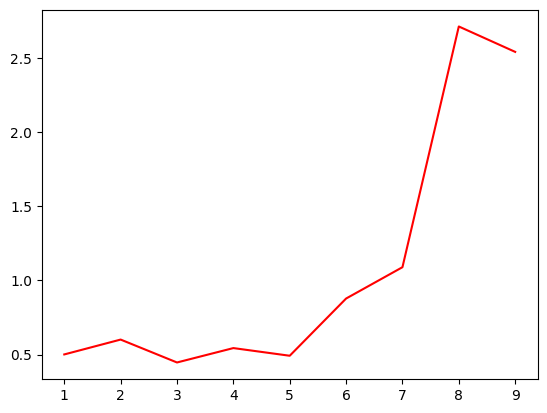

In [7]:
#day4 7.20

rms = []
RMSE_test = []
M = [1,2,3,4,5,6,7,8,9]
kf = KFold(n_splits=5)

for num in M:
    for train_index, test_index in kf.split(x,y):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]

      f = np.polyfit(x_train, y_train, num)
      p = np.poly1d(f)
      y_test_pred = p(x_test)
      rms.append(sqrt(mean_squared_error(y_test, y_test_pred)))
    RMSE_test.append(np.mean(rms))
print (RMSE_test)
plt.plot(M, RMSE_test, color='red')


degree = 1, RMSE = 0.50
degree = 2, RMSE = 0.60
degree = 3, RMSE = 0.45
degree = 4, RMSE = 0.54
degree = 5, RMSE = 0.49
degree = 6, RMSE = 0.88
degree = 7, RMSE = 1.09
degree = 8, RMSE = 2.71
degree = 9, RMSE = 2.54


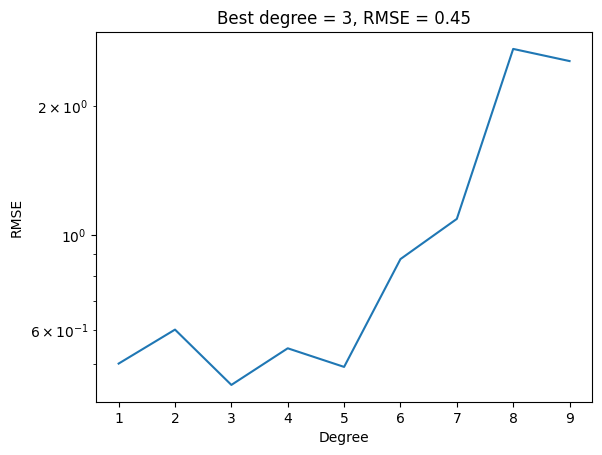

In [8]:
#day4 7.21

rms = []
rmses = []
RMSE_test = []
M = np.arange(1, 10)
min_rmse, min_deg= 1e10, 0

kf = KFold(n_splits=5)

for num in M:
    for train_index, test_index in kf.split(x,y):
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      x_train = x_train.reshape(-1, 1)
      x_test = x_test.reshape(-1, 1)

      poly = PolynomialFeatures(degree=num, include_bias=False)
      x_train_poly = poly.fit_transform(x_train)

      # 多项式拟合
      poly_reg = LinearRegression()
      poly_reg.fit(x_train_poly, y_train)

      # 测试集比较
      x_test_poly = poly.fit_transform(x_test)
      y_test_pred = poly_reg.predict(x_test_poly)

      #mean_squared_error(y_true, y_pred) #均方误差回归损失,越小越好。
      rms.append(sqrt(mean_squared_error(y_test, y_test_pred)))
    poly_rmse = np.mean(rms)
    rmses.append(poly_rmse)

    # degree交叉验证
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = num
    print('degree = %s, RMSE = %.2f' % (num, poly_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(M, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.set_title('Best degree = %s, RMSE = %.2f' %(min_deg, min_rmse))
plt.show()




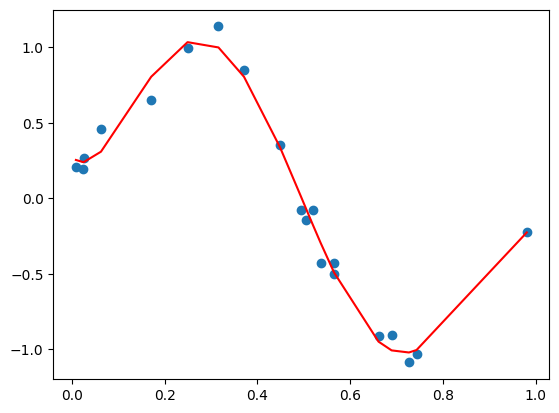

In [9]:
#day4 7.22

x = x.reshape(-1, 1)
poly = PolynomialFeatures(degree=5, include_bias=False)
x_train = poly.fit_transform(x)


# 多项式拟合
poly_reg = LinearRegression()
poly_reg.fit(x_train, y)

y_predict = poly_reg.predict(x_train)
plt.scatter(x,y)
sorted_indices = np.argsort(x[:,0], axis=0)
sorted_X2 = x[:,0][sorted_indices]
sorted_y2 = y_predict[sorted_indices]
plt.plot(sorted_X2, sorted_y2, color='r')
plt.show()
